In [2]:
## import modules
import os
import numpy as np

import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

warnings.filterwarnings('ignore')

In [4]:
## Load the Files

BASE_DIR = '/kaggle/input/animefacedataset/images'

In [5]:
#load complete img path to the list
image_paths = []
for image_name in os.listdir(BASE_DIR):
    image_path = os.path.join(BASE_DIR, image_name)
    image_paths.append(image_path)

In [19]:
image_paths[:5]

['/kaggle/input/animefacedataset/images/35715_2011.jpg',
 '/kaggle/input/animefacedataset/images/48610_2014.jpg',
 '/kaggle/input/animefacedataset/images/34719_2011.jpg',
 '/kaggle/input/animefacedataset/images/40266_2012.jpg',
 '/kaggle/input/animefacedataset/images/4199_2002.jpg']

In [30]:
len(image_paths)

63565

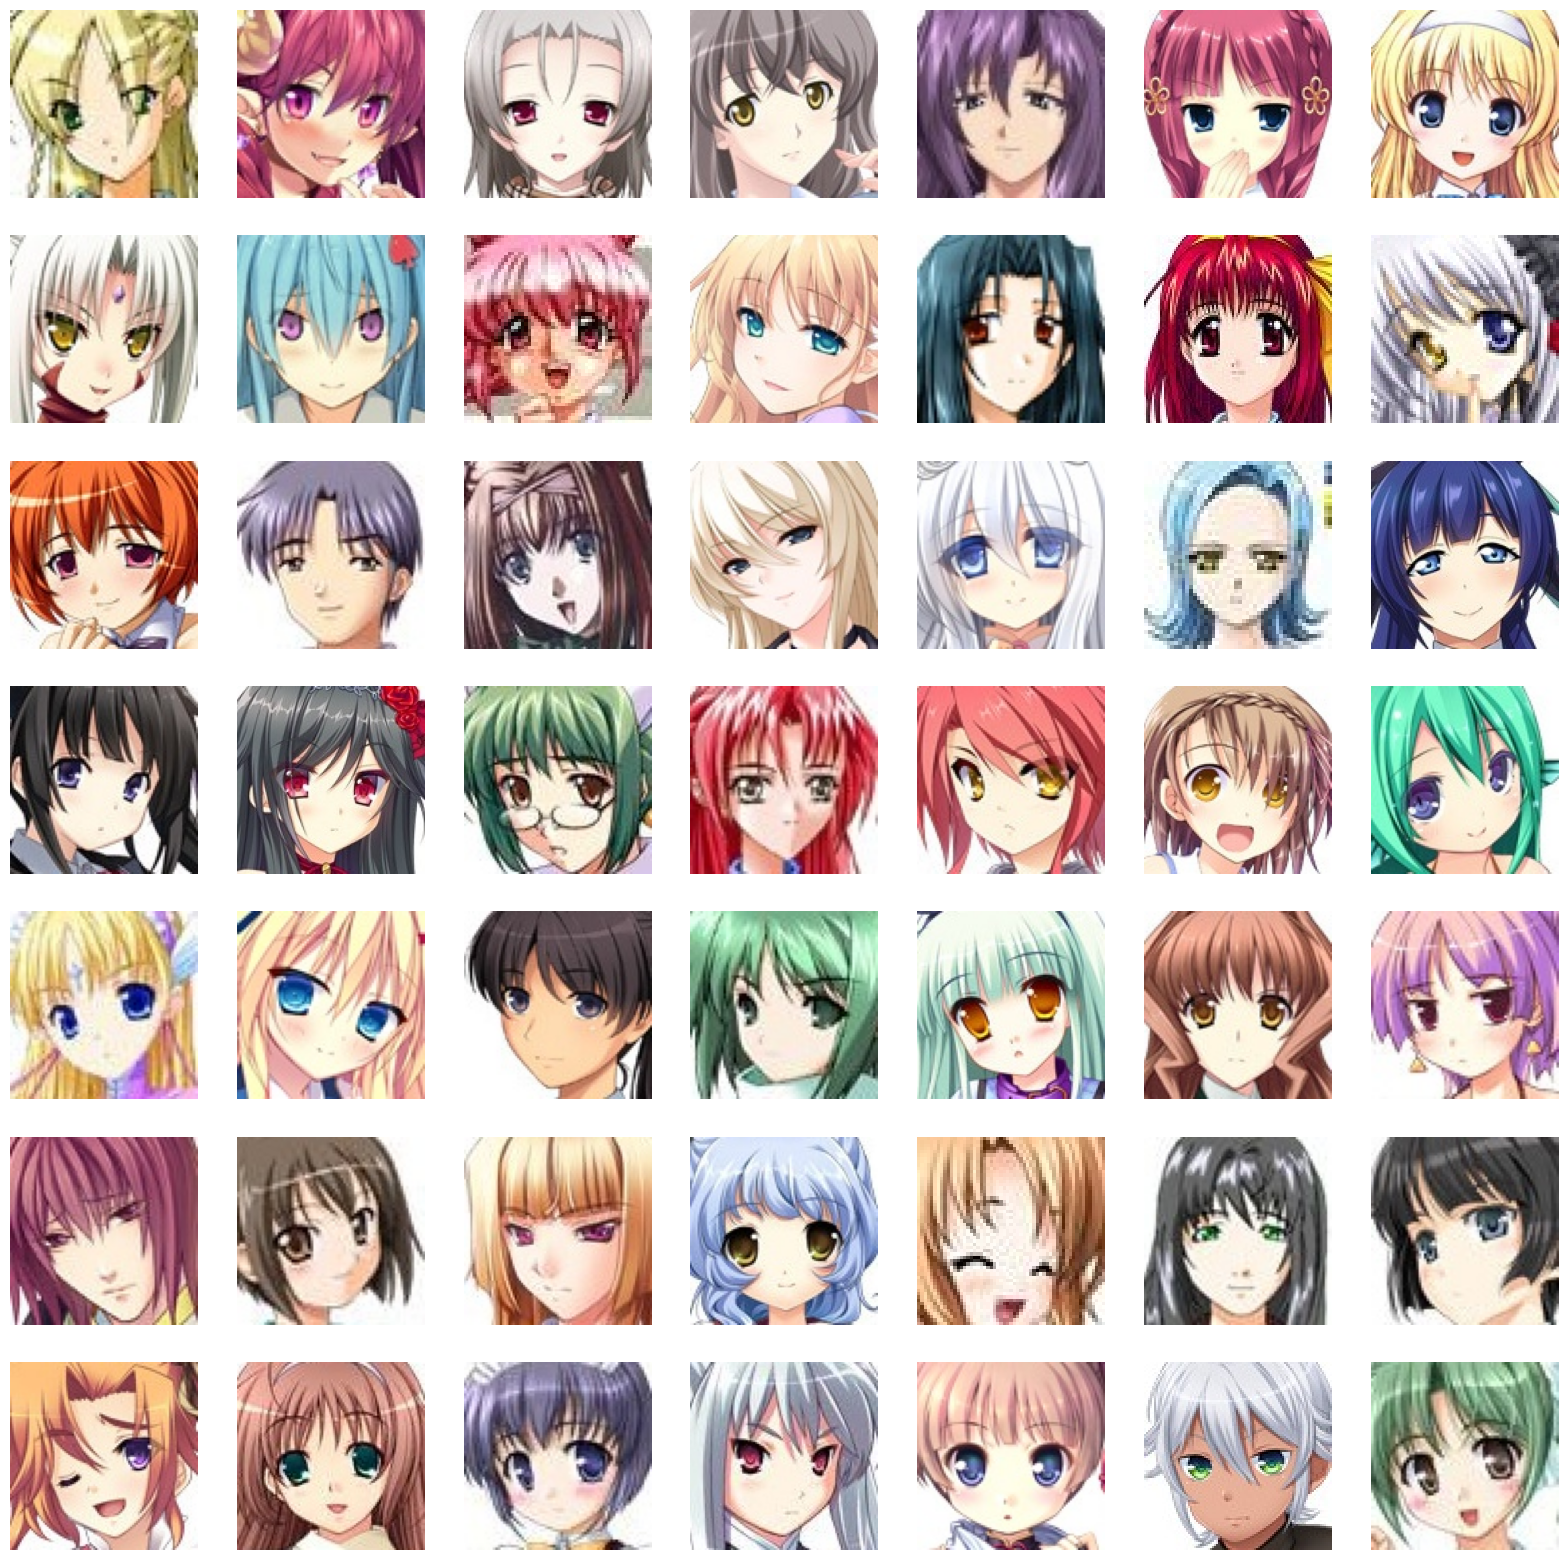

In [23]:
## visualize the image dataset
#to display grid of images
plt.figure(figsize=(20, 20))
temp_images = image_paths[:49]
index = 1

for image_path in temp_images:
    plt.subplot(7, 7, index)
    #load the image
    img = load_img(image_path)
    #convert to np array
    img = np.array(img)
    #show the img
    plt.imshow(img)
    plt.axis('off')
    #increment the index for next image
    index += 1

In [6]:
##pre-process image

#load the img and convert to np array
train_images = [np.array(load_img(path)) for path in tqdm(image_paths)]
train_images = np.array(train_images)

  0%|          | 0/63565 [00:00<?, ?it/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (63565,) + inhomogeneous part.

In [ ]:
train_images.shape

In [ ]:
#reshape the array
train_images = train_images.reshape(train_images.shape[0], 64, 64, 3).astype('float32')

In [ ]:
#normalize image
train_images = (train_images - 127.5)/127.5

In [ ]:
train_images[0]

In [ ]:
## create generator and discriminator

#latent dimensions for random noise
LATENT_DIM = 100
#weight initializer
WEIGHT_INIT = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

#no of channels of the image
CHANNELS= 3 #if you're using grayscale, then keep it as 1